In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [22]:
# Load in all labeled securities (updated Dec2018 with Raymond's 2007 Extraction)
df = pd.read_csv('output/all_labeled_v7_negative-shortfall.csv')

In [23]:
df

,PID,Prospectus,Class,norm_class,Name,Current_Balance,Zero-Balance Payment Period Number,Sum Principle Paid,MTG ORIG AMT,Maturity,...,Bloomberg Composite,HCLB,MTG INT SHRTFLL,HIST INTRST SHRTFLL min,HIST INTRST SHRTFLL max,HIST INTRST SHRTFLL sum,HIST UNSUPPORTED RISK SHRTFLL min,HIST UNSUPPORTED RISK SHRTFLL max,HIST UNSUPPORTED RISK SHRTFLL sum,Label
0,FC_3248,ABSC_1174519_0000950136-02-001637.txt,A1,A,ABSHE 2002-HE2 A1,0.0000,1,357.9480,357.9480,2032-08-15,...,NR,0.0000,NaN,0.00,0.00,0.00,-66.21,734.94,848.41,NMEm
1,FC_3248,ABSC_1174519_0000950136-02-001637.txt,A2,A,ABSHE 2002-HE2 A2,0.0000,1,357.9480,357.9480,2032-08-15,...,NR,0.0000,NaN,0.00,0.00,0.00,-72.99,120365.99,121235.76,NMEm
2,FC_3248,ABSC_1174519_0000950136-02-001637.txt,AIO,A,ABSHE 2002-HE2 AIO,0.0000,1,0.0000,112.1800,2032-08-15,...,NR,0.0000,NaN,0.00,0.00,0.00,-0.04,0.11,0.34,IOfailing
3,FC_3248,ABSC_1174519_0000950136-02-001637.txt,B,B,ABSHE 2002-HE2 B,12.3349,paying,12.7467,34.2954,2032-08-15,...,NR,9.2113,NaN,29355.27,29355.27,29355.27,-7856.44,80796.16,434090.51,NMEm
4,FC_3248,ABSC_1174519_0000950136-02-001637.txt,BIO,B,ABSHE 2002-HE2 BIO,0.0000,1,0.0000,70.0000,2032-08-15,...,NR,0.0000,NaN,0.00,0.00,0.00,0.00,0.00,0.00,IOpassMED
5,FC_3248,ABSC_1174519_0000950136-02-001637.txt,M1,M,ABSHE 2002-HE2 M1,0.0000,1,62.1610,62.1610,2032-08-15,...,NR,0.0000,NaN,0.00,0.00,0.00,-29.37,23016.89,46470.48,NMEm
6,FC_3248,ABSC_1174519_0000950136-02-001637.txt,M2,M,ABSHE 2002-HE2 M2,0.0000,1,45.0200,45.0200,2032-08-15,...,NR,0.0000,NaN,0.00,0.00,0.00,-118.40,16330.69,17071.93,NMEm
7,FC_2400,ABSC_1200136_0000950136-02-002975.txt,1A,A,ABSHE 2002-HE3 1A,0.0000,1,464.7900,464.7900,2032-10-15,...,NR,0.0000,NaN,0.00,0.00,0.00,-112.40,855.82,841.96,NMEm
8,FC_2400,ABSC_1200136_0000950136-02-002975.txt,1AIO,A,ABSHE 2002-HE3 1AIO,0.0000,1,0.0000,88.2000,2005-04-15,...,NR,0.0000,NaN,0.00,0.00,0.00,-0.02,7000.02,7000.39,IOfailing
9,FC_2400,ABSC_1200136_0000950136-02-002975.txt,1BIO,B,ABSHE 2002-HE3 1BIO,0.0000,1,0.0000,54.0000,2004-04-15,...,NR,0.0000,NaN,0.00,0.00,0.00,0.00,0.00,0.00,IOpassMED


In [24]:
# Make function to bin the shortfall values
# Bins: 0-1000, 1000-10000, 10000-100000, 100000-500000, 500000-1000000, 1000000-10000000, 10000000+

shortfall = 'HIST INTRST SHRTFLL sum'

def f(row):
    # Positive bins
    if row[shortfall] >=0 and row[shortfall] < 1000:
        bn = '0 : 1,000'
    elif row[shortfall] >=1000 and row[shortfall] < 10000:
        bn = '1,000 : 10,000'
    elif row[shortfall] >=10000 and row[shortfall] < 100000:
        bn = '10,000 : 100,000'
    elif row[shortfall] >=100000 and row[shortfall] < 500000:
        bn = '100,000 : 500,000'
    elif row[shortfall] >=500000 and row[shortfall] < 1000000:
        bn = '500,000 : 1,000,000'
    elif row[shortfall] >=1000000 and row[shortfall] < 10000000:
        bn = '1,000,000 : 10,000,000'
    elif row[shortfall] >=10000000:
        bn = '10,000,000+'
    
    # Negative bins
    elif row[shortfall] >= -1000 and row[shortfall] < 0:
        bn = '0 : -1,000'
    elif row[shortfall] >= -10000 and row[shortfall] < -1000:
        bn = '-1,000 : -10,000'
    elif row[shortfall] >= -100000 and row[shortfall] < -10000:
        bn = '-10,000 : -100,000'
    elif row[shortfall] >= -500000 and row[shortfall] < -100000:
        bn = '-100,000 : -500,000'
    elif row[shortfall] >= -1000000 and row[shortfall] < -500000:
        bn = '-500,000 : -1,000,000'
    elif row[shortfall] >= -10000000 and row[shortfall] < -1000000:
        bn = '-1,000,000 : -10,000,000'
    elif row[shortfall] < 10000000:
        bn = '-10,000,000+'
        
    else:
        bn = 'NaN'

    return bn

df[shortfall + ' bin'] = df.apply(f, axis=1)

shortfall = 'HIST UNSUPPORTED RISK SHRTFLL sum'
df[shortfall + ' bin'] = df.apply(f, axis=1)

In [25]:
df

,PID,Prospectus,Class,norm_class,Name,Current_Balance,Zero-Balance Payment Period Number,Sum Principle Paid,MTG ORIG AMT,Maturity,...,MTG INT SHRTFLL,HIST INTRST SHRTFLL min,HIST INTRST SHRTFLL max,HIST INTRST SHRTFLL sum,HIST UNSUPPORTED RISK SHRTFLL min,HIST UNSUPPORTED RISK SHRTFLL max,HIST UNSUPPORTED RISK SHRTFLL sum,Label,HIST INTRST SHRTFLL sum bin,HIST UNSUPPORTED RISK SHRTFLL sum bin
0,FC_3248,ABSC_1174519_0000950136-02-001637.txt,A1,A,ABSHE 2002-HE2 A1,0.0000,1,357.9480,357.9480,2032-08-15,...,NaN,0.00,0.00,0.00,-66.21,734.94,848.41,NMEm,"0 : 1,000","0 : 1,000"
1,FC_3248,ABSC_1174519_0000950136-02-001637.txt,A2,A,ABSHE 2002-HE2 A2,0.0000,1,357.9480,357.9480,2032-08-15,...,NaN,0.00,0.00,0.00,-72.99,120365.99,121235.76,NMEm,"0 : 1,000","100,000 : 500,000"
2,FC_3248,ABSC_1174519_0000950136-02-001637.txt,AIO,A,ABSHE 2002-HE2 AIO,0.0000,1,0.0000,112.1800,2032-08-15,...,NaN,0.00,0.00,0.00,-0.04,0.11,0.34,IOfailing,"0 : 1,000","0 : 1,000"
3,FC_3248,ABSC_1174519_0000950136-02-001637.txt,B,B,ABSHE 2002-HE2 B,12.3349,paying,12.7467,34.2954,2032-08-15,...,NaN,29355.27,29355.27,29355.27,-7856.44,80796.16,434090.51,NMEm,"10,000 : 100,000","100,000 : 500,000"
4,FC_3248,ABSC_1174519_0000950136-02-001637.txt,BIO,B,ABSHE 2002-HE2 BIO,0.0000,1,0.0000,70.0000,2032-08-15,...,NaN,0.00,0.00,0.00,0.00,0.00,0.00,IOpassMED,"0 : 1,000","0 : 1,000"
5,FC_3248,ABSC_1174519_0000950136-02-001637.txt,M1,M,ABSHE 2002-HE2 M1,0.0000,1,62.1610,62.1610,2032-08-15,...,NaN,0.00,0.00,0.00,-29.37,23016.89,46470.48,NMEm,"0 : 1,000","10,000 : 100,000"
6,FC_3248,ABSC_1174519_0000950136-02-001637.txt,M2,M,ABSHE 2002-HE2 M2,0.0000,1,45.0200,45.0200,2032-08-15,...,NaN,0.00,0.00,0.00,-118.40,16330.69,17071.93,NMEm,"0 : 1,000","10,000 : 100,000"
7,FC_2400,ABSC_1200136_0000950136-02-002975.txt,1A,A,ABSHE 2002-HE3 1A,0.0000,1,464.7900,464.7900,2032-10-15,...,NaN,0.00,0.00,0.00,-112.40,855.82,841.96,NMEm,"0 : 1,000","0 : 1,000"
8,FC_2400,ABSC_1200136_0000950136-02-002975.txt,1AIO,A,ABSHE 2002-HE3 1AIO,0.0000,1,0.0000,88.2000,2005-04-15,...,NaN,0.00,0.00,0.00,-0.02,7000.02,7000.39,IOfailing,"0 : 1,000","1,000 : 10,000"
9,FC_2400,ABSC_1200136_0000950136-02-002975.txt,1BIO,B,ABSHE 2002-HE3 1BIO,0.0000,1,0.0000,54.0000,2004-04-15,...,NaN,0.00,0.00,0.00,0.00,0.00,0.00,IOpassMED,"0 : 1,000","0 : 1,000"


In [26]:
# Count number of each bin for both shortfall fields
df['HIST UNSUPPORTED RISK SHRTFLL sum bin'].value_counts()

0 : 1,000                   20666
1,000 : 10,000               7118
0 : -1,000                   6610
10,000 : 100,000             5495
NaN                          2950
-1,000 : -10,000             2215
-10,000 : -100,000           1832
100,000 : 500,000            1817
-100,000 : -500,000           411
500,000 : 1,000,000           353
1,000,000 : 10,000,000        342
-1,000,000 : -10,000,000      120
-500,000 : -1,000,000          88
10,000,000+                    37
-10,000,000+                   36
Name: HIST UNSUPPORTED RISK SHRTFLL sum bin, dtype: int64

In [27]:
df['HIST INTRST SHRTFLL sum bin'].value_counts()

0 : 1,000                   40534
10,000 : 100,000             2059
1,000 : 10,000               1854
0 : -1,000                   1503
NaN                          1092
100,000 : 500,000             812
-10,000 : -100,000            612
-1,000 : -10,000              568
1,000,000 : 10,000,000        524
500,000 : 1,000,000           264
-100,000 : -500,000           181
-1,000,000 : -10,000,000       29
-500,000 : -1,000,000          28
10,000,000+                    26
-10,000,000+                    4
Name: HIST INTRST SHRTFLL sum bin, dtype: int64

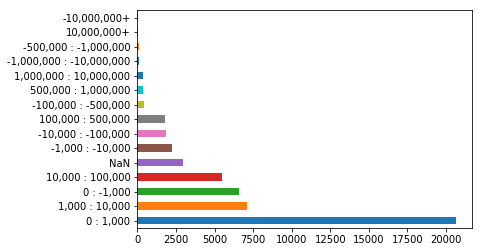

In [28]:
# Frequency chart for HIST UNSUPPORTED RISK SHRTFLL
df['HIST UNSUPPORTED RISK SHRTFLL sum bin'].value_counts().plot(kind='barh')

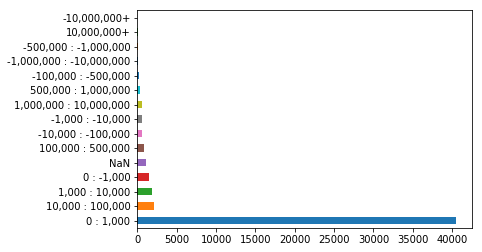

In [30]:
# Frequency chart for HIST INTRST SHRTFLL
df['HIST INTRST SHRTFLL sum bin'].value_counts().plot(kind='barh')